==========================================
### Bike Sharing Dataset
==========================================

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal


=========================================
### Background 
=========================================

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into
a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important
events in the city could be detected via monitoring these data.

=========================================
### Data Set
=========================================

Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to  
the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is 
publicly available in http://capitalbikeshare.com/system-data. We aggregated the data on two hourly and daily basis and then 
extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com. 

=========================================
### Associated tasks
=========================================

	- Regression: 
		Predication of bike rental count hourly or daily based on the environmental and seasonal settings.
	
	- Event and Anomaly Detection:  
		Count of rented bikes are also correlated to some events in the town which easily are traceable via search engines.
		For instance, query like "2012-10-30 washington d.c." in Google returns related results to Hurricane Sandy. Some of the important events are identified in [1]. Therefore the data can be used for validation of anomaly or event detection algorithms as well.


=========================================
### Files
=========================================

	- Readme.txt
	- hour.csv : bike sharing counts aggregated on hourly basis. Records: 17379 hours
	- day.csv - bike sharing counts aggregated on daily basis. Records: 731 days

	
=========================================
### Dataset characteristics
=========================================	
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
	
	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	
=========================================
###  License
=========================================

Use of this dataset in publications must be cited to the following publication:

[1] Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, doi:10.1007/s13748-013-0040-3.

@article{
	year={2013},
	issn={2192-6352},
	journal={Progress in Artificial Intelligence},
	doi={10.1007/s13748-013-0040-3},
	title={Event labeling combining ensemble detectors and background knowledge},
	url={http://dx.doi.org/10.1007/s13748-013-0040-3},
	publisher={Springer Berlin Heidelberg},
	keywords={Event labeling; Event detection; Ensemble learning; Background knowledge},
	author={Fanaee-T, Hadi and Gama, Joao},
	pages={1-15}
}

In [2]:
import pandas as pd
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8  # defining all figure size in this notebook
import matplotlib.pyplot as plt

<a id='index'></a>
# Content of the notebook:
1. <a href="#Section1"> Data loading, Preprocessing </a>
2. <a href="#Section2"> EDA </a>
3. <a href="#Section3"> Stationarity check</a>
    - Seasonality, trend, Decomposition, ADF test
    - ACF, PACF 
4. <a href="#SectionMakeStationary">Making Employed Person data stationary</a>
5. <a href="#Section4"> Time Series Forecasting analysis with ARIMA - Fitting, Validating, </a>
6. <a href="#Section5"> Facebook Prophet</a>
7. <a href="#Section6"> Comparision of results</a>

<a id='Section1'></a>
# Data Preprocessing

- This step includes-studying data, removin not required columns, check missing values, aggregate sales by date and so on.

In [3]:
pdInputHr=pd.read_csv("hour.csv")
pdInputDay=pd.read_csv("day.csv")
pdInputDay.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
#check missing values
pdInputDay.isnull().sum() # we have 0 null / missing values. Hence no need to impute the values

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
len(pdInputDay) # we have total 731 Datapoints 

731

In [6]:
print("""Data is from {} to {} \nRented Bikes count values in the range of (min: {}, max: {}, mean: {})"""\
      .format(pdInputDay.dteday.min(), pdInputDay.dteday.max(), pdInputDay.cnt.min(), pdInputDay.cnt.max(), pdInputDay.cnt.mean()) )

Data is from 2011-01-01 to 2012-12-31 
Rented Bikes count values in the range of (min: 22, max: 8714, mean: 4504.3488372093025)


In [7]:
pdInputDay.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [8]:
#pdInputHr['DateTime']=pd.to_datetime(pdInputHr.dteday+ ' ' + pdInputHr['hr'].astype(str)+ ":00:00", format='%Y-%m-%d %H:%M:%S')
pdInputDay['dteday']=pd.to_datetime(pdInputDay['dteday'])

In [9]:
#casual: count of casual users
#registered: count of registered users
#cnt: count of total rental bikes including both casual and registered
pdInputDay=pdInputDay.rename(columns={'casual': "CasualUsers",'registered':"RegisteredUsers", 'cnt': "RentalBikes"})

### EDA - Non-Seasonal Dataset

<AxesSubplot:xlabel='dteday'>

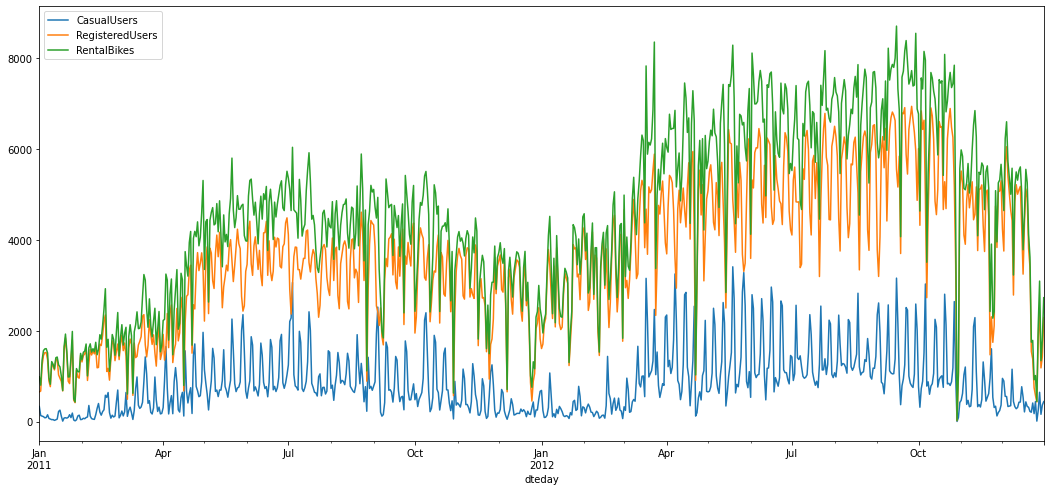

In [10]:
pdInputDay.set_index('dteday')[['CasualUsers','RegisteredUsers', 'RentalBikes']].plot()

### Observations: 
1. Count of Casual users is high all the time => Can be converted to Registered users
2. Registered users can be pushed to rent more bikes
3. Rented bike consists of both Casual as well as Registered users. Graph shows there is scope of increase in the rented bikes 

In [11]:
# our time series is:
y = pdInputDay.set_index("dteday")[['RentalBikes']]
y.head()

,RentalBikes
dteday,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600


<AxesSubplot:title={'center':'Count of total rental bikes including both casual and registered'}, xlabel='dteday'>

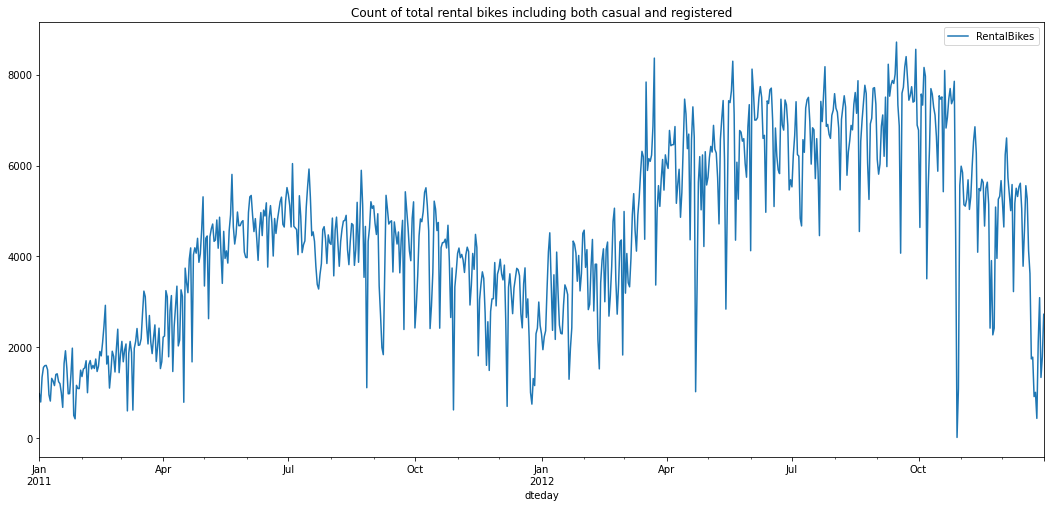

In [12]:
y[['RentalBikes']].plot(title="Count of total rental bikes including both casual and registered")

array([[<AxesSubplot:title={'center':'RentalBikes'}>]], dtype=object)

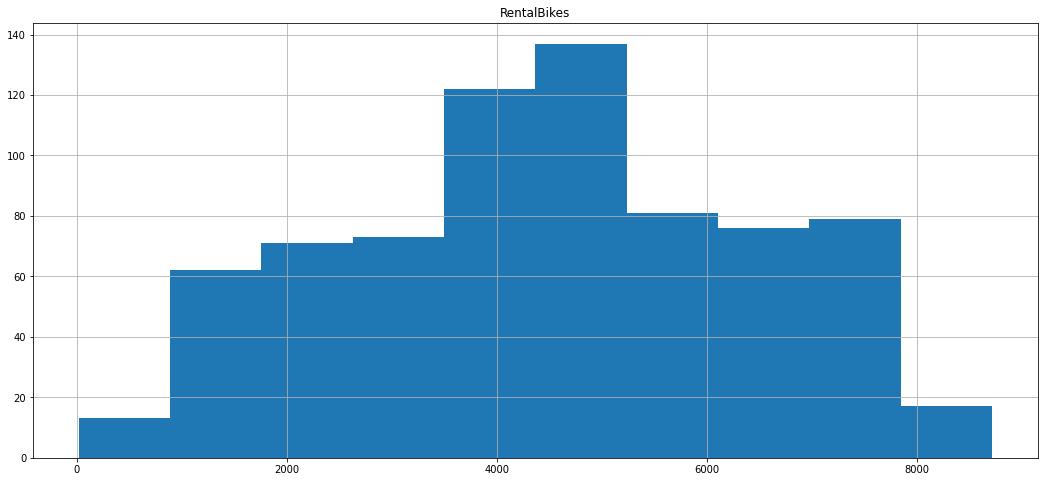

In [13]:
y = pdInputDay.set_index('dteday')[['RentalBikes']]
y.hist()

In [14]:
# Observation: data is more or less normally distributed

<a id='Section3'></a>

# 3. Stationarity Check

- Stationarity is a key part of time series analysis. Simply put, stationarity means that the manner in which time series data changes is constant. 
- A stationary time series will not have any trends or seasonal patterns. 
- You should check for stationarity because it not only makes modeling time series easier, but it is an underlying assumption in many time series methods. 
- Specifically, stationarity is assumed for a wide variety of time series forecasting methods including autoregressive moving average (ARMA), ARIMA and Seasonal ARIMA (SARIMA).

source: https://builtin.com/data-science/time-series-python

### Method 1: Visualization - plot of time series data


#### Seasonality Check
- **Seasonality** in a time series is a regular pattern of changes that repeats over S time periods, where S defines the number of time periods until the pattern repeats again.

- For example, there is seasonality in monthly data for which high values tend always to occur in some particular months and low values tend always to occur in other particular months. 
- In this case, S = 12 (months per year) is the span of the periodic seasonal behavior. For quarterly data, S = 4 time periods per year.

<AxesSubplot:title={'center':'Bike Sharing Daily Data (Jan 2011 to Dec 2012)'}, xlabel='dteday'>

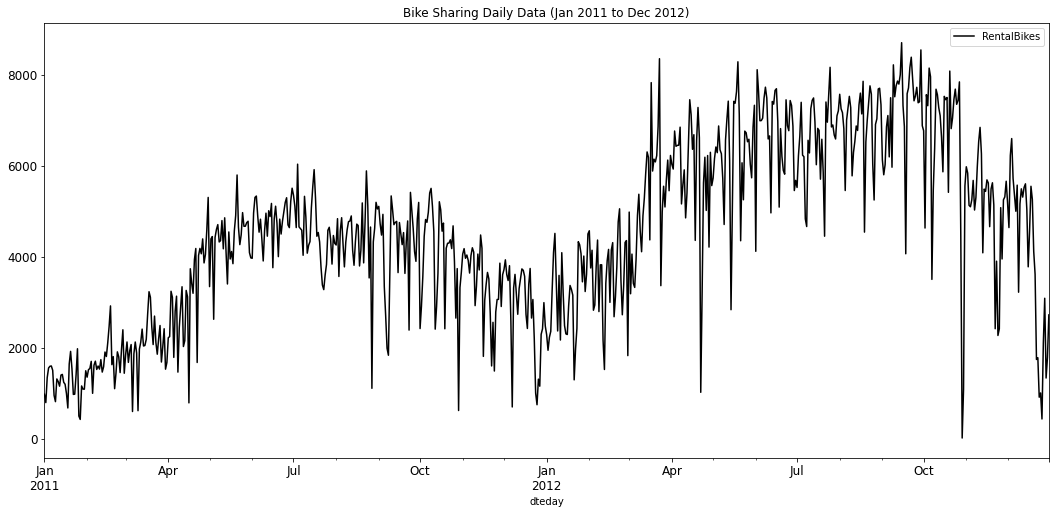

In [15]:
y.plot(title="Bike Sharing Daily Data (Jan 2011 to Dec 2012)", \
       color = ['k'], fontsize = '12', rot ='0')

In [16]:
# Observation: no seasonality. No trend since it's fluctuating.

### Method 2: Visualization  - Rolling mean and std

We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

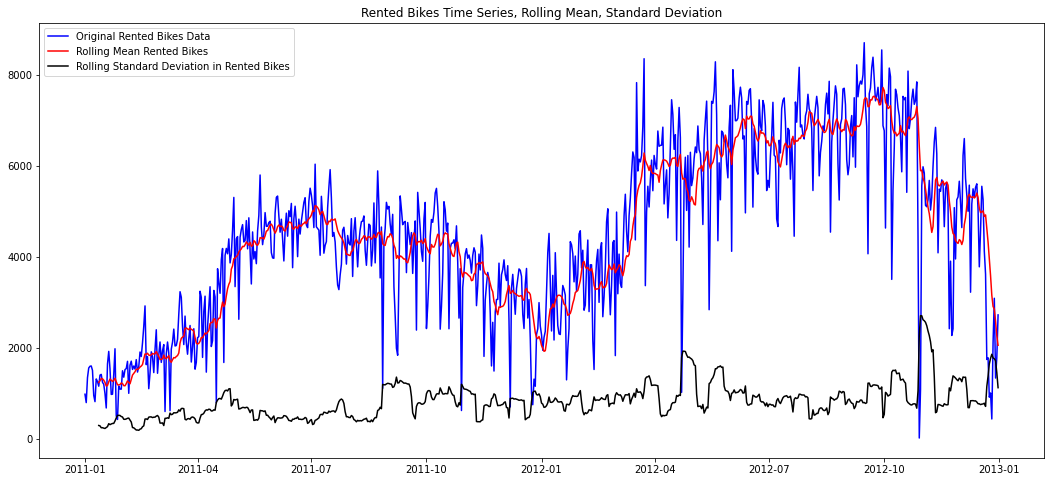

In [17]:
#Let’s test for stationarity in our data. To start, let’s calculate a 12-month rolling mean:
rolling_mean = y.rolling(12).mean()
rolling_std  = y.rolling(12).std()

#let’s overlay our time series with the seven-month rolling mean and seven-month rolling standard deviation. 
# First, let’s make a Matplotlib plot of our time series:
plt.plot(y, color="blue",label="Original Rented Bikes Data")
plt.plot(rolling_mean, color="red", label="Rolling Mean Rented Bikes")
plt.plot(rolling_std, color="black", label = "Rolling Standard Deviation in Rented Bikes")
plt.title("Rented Bikes Time Series, Rolling Mean, Standard Deviation")
plt.legend(loc="best")

# Observation: 12 month rolling mean shows there is no fixed trend its fluctuating and std plot is also
# fluctuating throughout

### Method 3: Visualization - Decomposition to check trend Vs seasonality

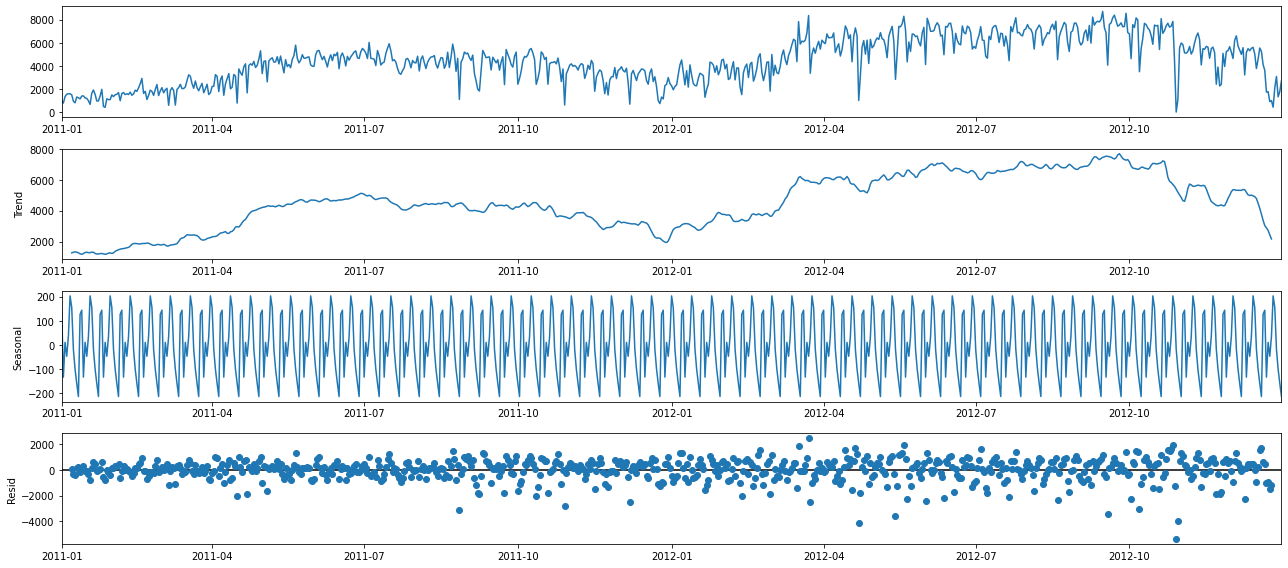

In [18]:
#!pip install statsmodels
#Trend vs. Seasonality
#The next piece is actually running the seasonal decomposition. The dataframe is passed in as an argument 
#as well as period=12 to represent our monthly data and find year-over-year seasonality.
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(y, model='additive', period=12)
fig = decomposition.plot()
plt.show()

In [19]:
### Observations: Overall above decomposition shows:
#1. There is no fixed trend its fluctuating
#2. There seems to be some sesonality component present
#3. Residual are away from the central line 

### Method 4: Looking at Mean and Variance
Because we are looking at the mean and variance, we are assuming that the data conforms to a Gaussian (also called the bell curve or normal) distribution. 
- We can also quickly check this by eyeballing a histogram of our observations.
- Running the example plots a histogram of values from the time series. We clearly see the bell curve-like shape of the Gaussian distribution, perhaps with a longer right tail.
- Next, we can split the time series into two contiguous sequences. We can then calculate the mean and variance of each group of numbers and compare the values.

In [20]:
# Checking the stationarity 
# Cutting straight to the chase, we can split our dataset and calculate the mean and variance for each group.

split = round(len(y) / 2)
y1, y2 = y[0:split], y[split:]
mean1, mean2 = y1.mean(), y2.mean()
var1, var2 = y1.var(), y2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=3402.724044, mean2=5608.991781
variance1=1899130.644187, variance2=3178014.574108


In [21]:
# Observation: Running the example, we can see the mean and variance look very different => Non-stationry

[]

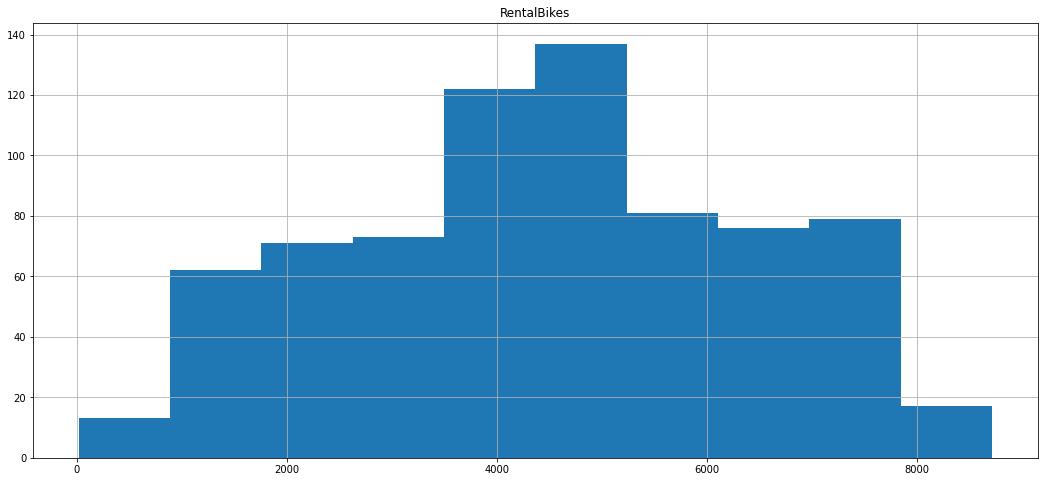

In [22]:
# Now let's check the histogram - Let’s take one step back and check if assuming a Gaussian distribution makes sense 
# in this case by plotting the values of the time series as a histogram.
y.hist()
plt.plot()

In [23]:
## Observation: 
# 1. Running the example shows that indeed the distribution of values does look like a Gaussian, 
# but if we check out the mean and variance values are it feels like this is non-stationary data.

### Method 5: Augmented Dickey-Fuller test
- Statistical tests make strong assumptions about your data. They can only be used to inform the degree to which a null hypothesis can be rejected or fail to be reject. The result must be interpreted for a given problem to be meaningful.
- Nevertheless, they can provide a quick check and confirmatory evidence that your time series is stationary or non-stationary.

The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.

The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

There are a number of unit root tests and the Augmented Dickey-Fuller may be one of the more widely used. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

- Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
- Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

- p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
- p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [24]:
#zip basically combines result,labels
from statsmodels.tsa.stattools import adfuller
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        
adfuller_test(y)
# source: https://www.kaggle.com/code/avi111297/predicting-sales-using-arima-sarimax-tsf-model

ADF Test Statistic : -1.8774481444374302
p-value : 0.3427434403392191
#Lags Used : 13
Number of Observations Used : 717
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### Method 6: Ljung-Box test (optional - not able to comprehend completely)

The Ljung-Box test is a statistical test that checks if autocorrelation exists in a time series.

It uses the following hypotheses:

H0: The residuals are independently distributed.

HA: The residuals are not independently distributed; they exhibit serial correlation.

Ideally, we would like to fail to reject the null hypothesis. That is, we would like to see the p-value of the test be greater than 0.05 because this means the residuals for our time series model are independent, which is often an assumption we make when creating a model.

In [25]:
#fit ARMA model to dataset
res = sm.tsa.ARMA(y, (1,1)).fit(disp=-1)
#perform Ljung-Box test on residuals with lag=1 to 40
sm.stats.acorr_ljungbox(res.resid, lags=None, return_df=True)
#This function returns a test statistic and a corresponding p-value. 
# If the p-value is less than some threshold (e.g. α = .05), you can reject the null hypothesis and 
# conclude that the residuals are not independently distributed.

C:\Users\yoges\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\yoges\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D wil

,lb_stat,lb_pvalue
1,25.096086,5.454345e-07
2,30.261779,2.683727e-07
3,51.880077,3.176627e-11
4,69.144417,3.440262e-14
5,72.591275,2.957821e-14
6,74.841957,4.136914e-14
7,75.203331,1.304049e-13
8,75.226595,4.443242e-13
9,76.244929,8.968985e-13
10,76.461626,2.469537e-12


In [26]:
### Observation: 
#1. from lag=1 Ib_pvalue are less than 0.05 => Rejecting null hypothesis concluding the residuals 
# are not independently distributed

### Method 7: Checking ACF and PACF
##### Correlation and Autocorrelation

We can calculate the correlation for time series observations with observations with previous time steps, called lags. Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an autocorrelation.
A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function, or the acronym ACF. This plot is sometimes called a correlogram or an autocorrelation plot.

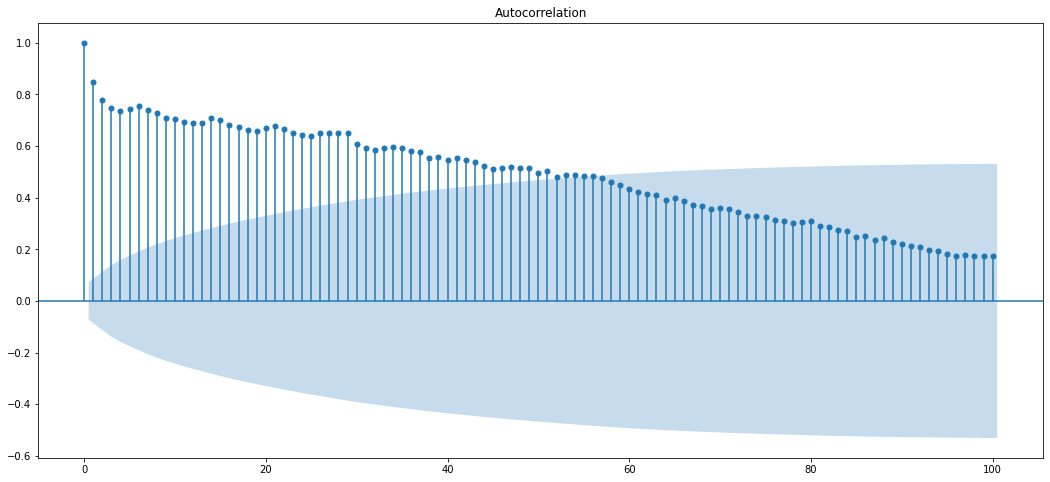

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#creates a 2D plot showing the lag value along the x-axis and the correlation on the y-axis between -1 and 1.
plot_acf(y, lags=100)
plt.show()
#Confidence intervals are drawn as a cone. By default, this is set to a 95% confidence interval, suggesting
#that correlation values outside of this code are very likely a correlation and not a statistical fluke.

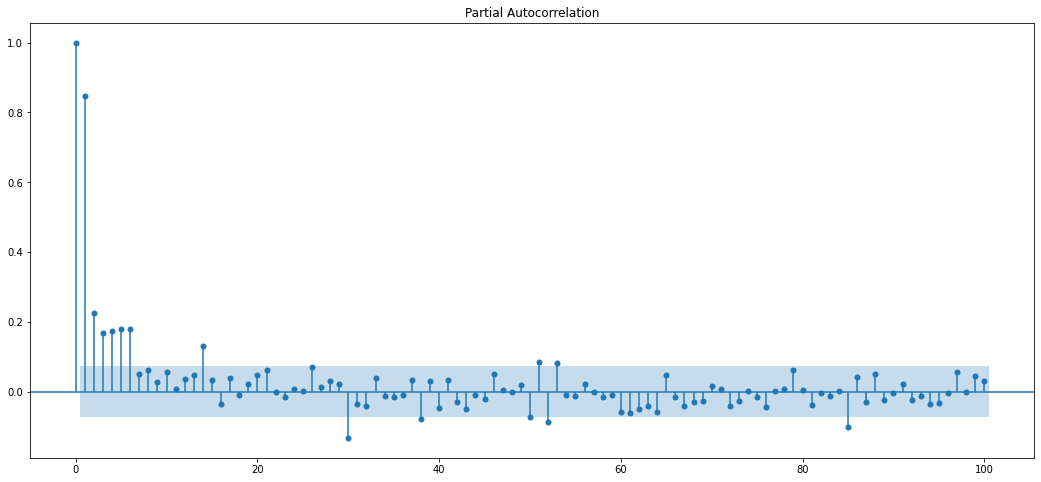

In [28]:
plot_pacf(y, lags=100)
plt.show()

In [29]:
# Observation - hard to see any seasonal pattern or repeatations.

#### Conclusion of Stationarity Checks:
- From method ADF Test Statistic it's clear that we have non stationary time series data which is not having seasonality  but slight trend in it. 
- We will need to make it stationary before finding the parameters 

<a id='SectionMakeStationary'></a>
# 4. Making Time Series data stationary

#### Non-Stationary Time Series
1. Observations from a non-stationary time series show seasonal effects, trends, and other structures that depend on the time index.
2. Summary statistics like the mean and variance do change over time, providing a drift in the concepts a model may try to capture.
3. Classical time series analysis and forecasting methods are concerned with making non-stationary time series data stationary by identifying and removing trends and removing stationary effects.

#### Why to make data stationary?
1. The observations in a stationary time series are not dependent on time.
2. Time series are stationary if they do not have trend or seasonal effects. Summary statistics calculated on the time series are consistent over time, like the mean or the variance of the observations.
3. When a time series is stationary, it can be easier to model. Statistical modeling methods assume or require the time series to be stationary.


### Method 1: Differencing to make data stationary

#### Difference Transform
- Differencing is a method of transforming a time series dataset.
- It can be used to remove the series dependence on time, so-called temporal dependence. This includes structures like trends and seasonality.
    - "Differencing can help stabilize the mean of the time series by removing changes in the level of a time series, and so eliminating (or reducing) trend and seasonality." — Page 215, Forecasting: principles and practice.

- Differencing is performed by subtracting the previous observation from the current observation.
    - difference(t) = observation(t) - observation(t-1)
- Inverting the process is required when a prediction must be converted back into the original scale.
- This process can be reversed by adding the observation at the prior time step to the difference value.
    - inverted(t) = differenced(t) + observation(t-1)
- In this way, a series of differences and inverted differences can be calculated.

Source: https://machinelearningmastery.com/remove-trends-seasonality-difference-transform-python/

In [30]:
len(y)

731

<AxesSubplot:xlabel='dteday'>

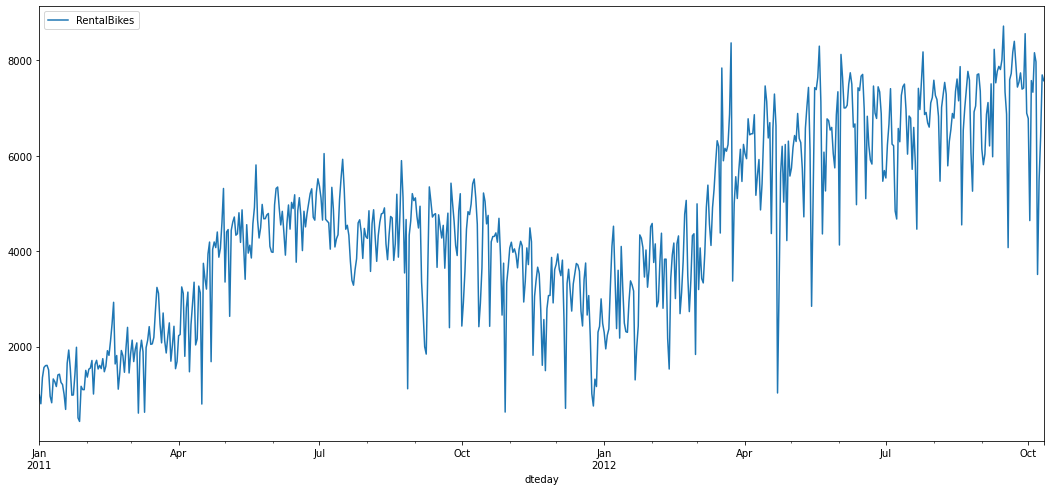

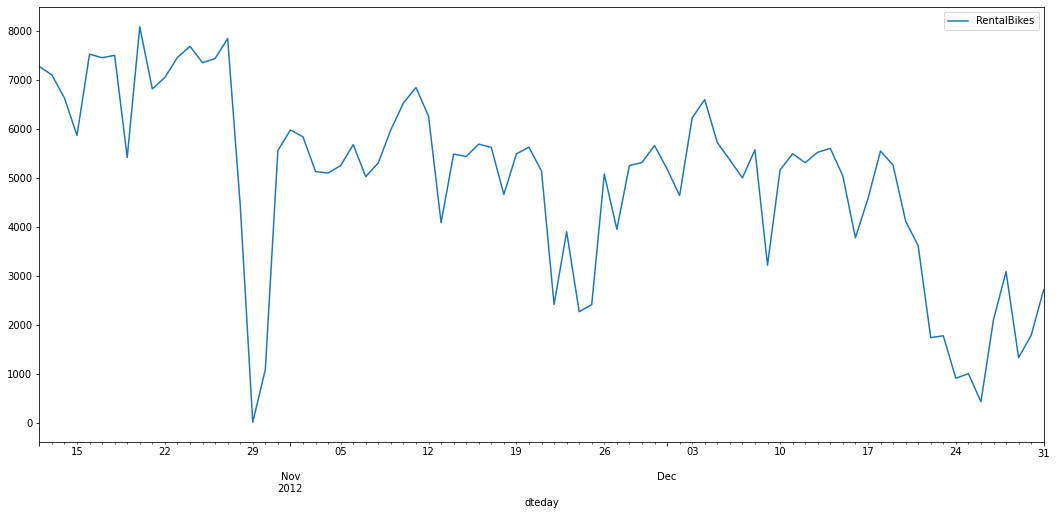

In [31]:
# Spliting data into training and testing sets 
from pmdarima import model_selection
train, test = model_selection.train_test_split(y, train_size=650)

train.plot()
test.plot()

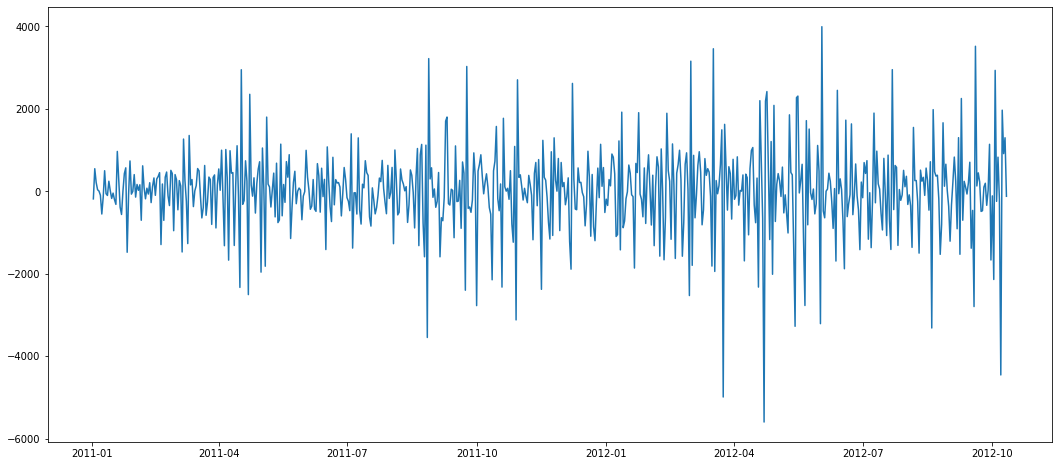

In [32]:
plt.plot(train.diff(periods=1)) #built-in Pandas implementation of the difference transform. 
#it takes an argument to specify the interval or lag, in this case called the periods.
#source: https://machinelearningmastery.com/difference-time-series-dataset-python/

[]

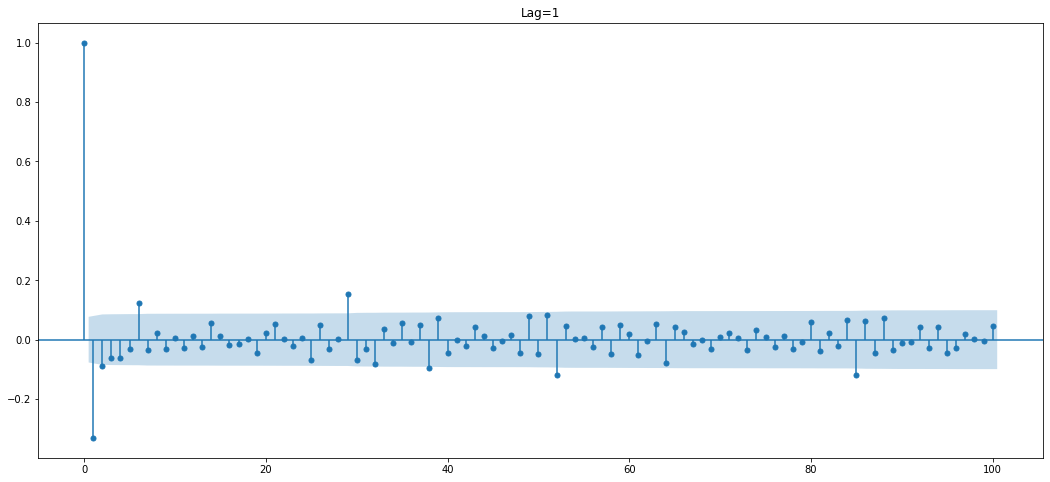

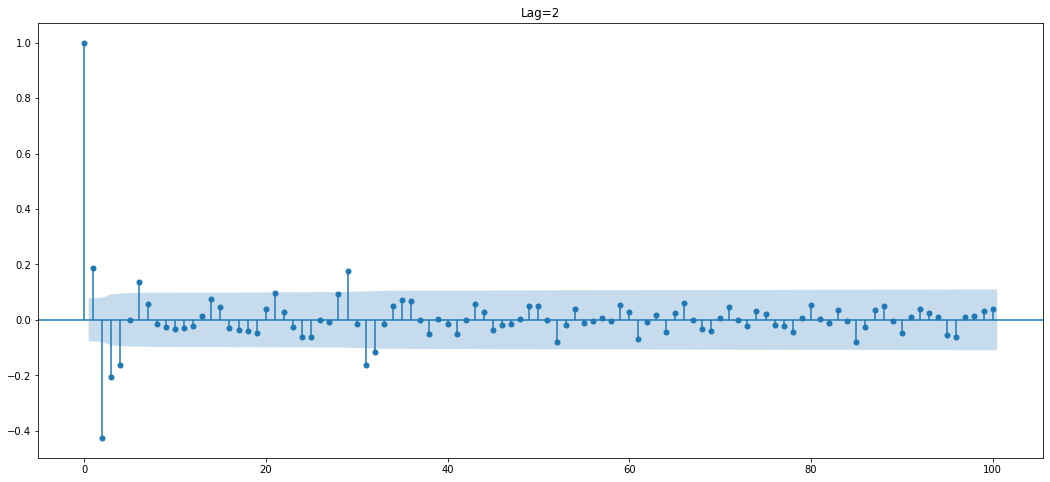

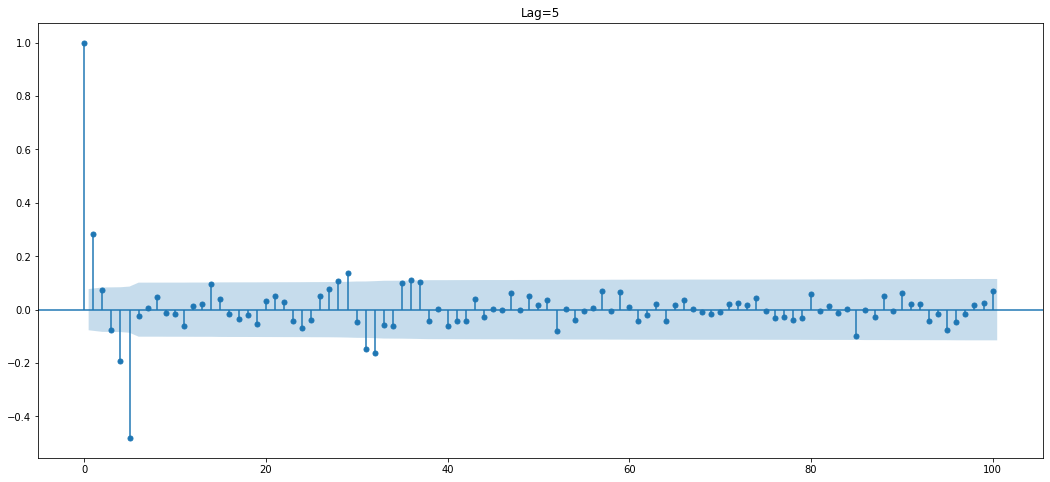

In [33]:
plot_acf(train.diff(periods=1).dropna(), lags=100, title="Lag=1") # Observation: Remove nan else acf will not plot anything
plot_acf(train.diff(periods=2).dropna(), lags=100, title="Lag=2") # Observation: Remove nan else acf will not plot anything
plot_acf(train.diff(periods=5).dropna(), lags=100, title="Lag=5") # Observation: Remove nan else acf will not plot anything
plt.plot()

In [34]:
# Observations:
# For the difference with lag/periods as 1 and 2 having few spikes outside the confidance interval ( continue till 30)
# For the difference with lag/periods as 5 we can see after lag=30 in ACF all the spikes lying inside the interval
# But not sure hence let's perform ADF test again

In [35]:
print("\nOriginal")
adfuller_test(train)
print("\nTaken difference with periods=1")
adfuller_test(train.diff(periods=1).dropna())
print("\nTaken difference with periods=2")
adfuller_test(train.diff(periods=2).dropna())


Original
ADF Test Statistic : -1.4920893532440647
p-value : 0.5374209300206096
#Lags Used : 13
Number of Observations Used : 636
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 

Taken difference with periods=1
ADF Test Statistic : -11.627652095896327
p-value : 2.3028474478368592e-21
#Lags Used : 12
Number of Observations Used : 636
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary

Taken difference with periods=2
ADF Test Statistic : -12.007161697464587
p-value : 3.2437209303287846e-22
#Lags Used : 11
Number of Observations Used : 636
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [36]:
print("\nTaken difference with periods=3")
adfuller_test(train.diff(periods=3).dropna())
print("\nTaken difference with periods=4")
adfuller_test(train.diff(periods=4).dropna())
print("\nTaken difference with periods=5")
adfuller_test(train.diff(periods=5).dropna())


Taken difference with periods=3
ADF Test Statistic : -7.680272896964453
p-value : 1.5104198925946832e-11
#Lags Used : 18
Number of Observations Used : 628
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary

Taken difference with periods=4
ADF Test Statistic : -6.338594681367104
p-value : 2.790686686897342e-08
#Lags Used : 20
Number of Observations Used : 625
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary

Taken difference with periods=5
ADF Test Statistic : -6.3025961609900945
p-value : 3.3834491150368086e-08
#Lags Used : 20
Number of Observations Used : 624
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


[]

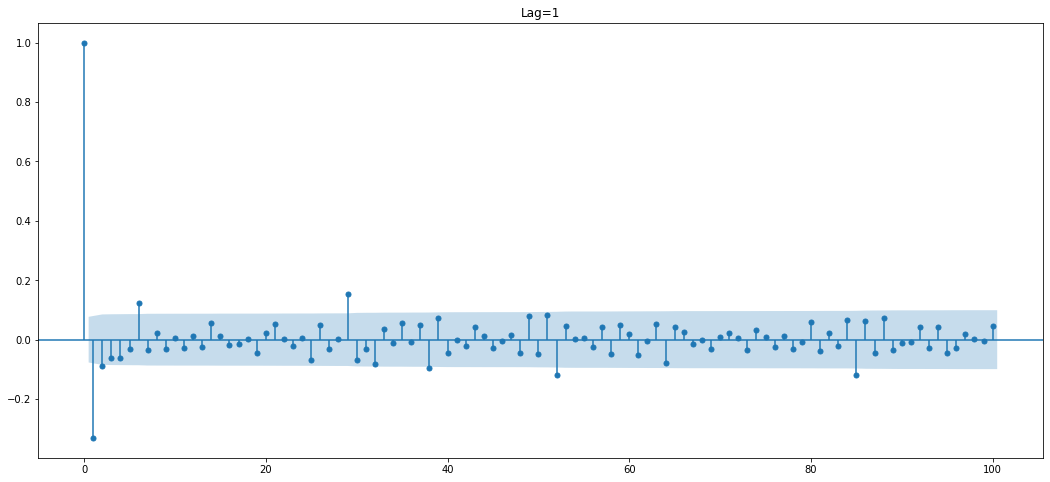

In [37]:
plot_acf(train.diff(periods=1).dropna(), lags=100, title="Lag=1") # Observation: Remove nan else acf will not plot anything
plt.plot()

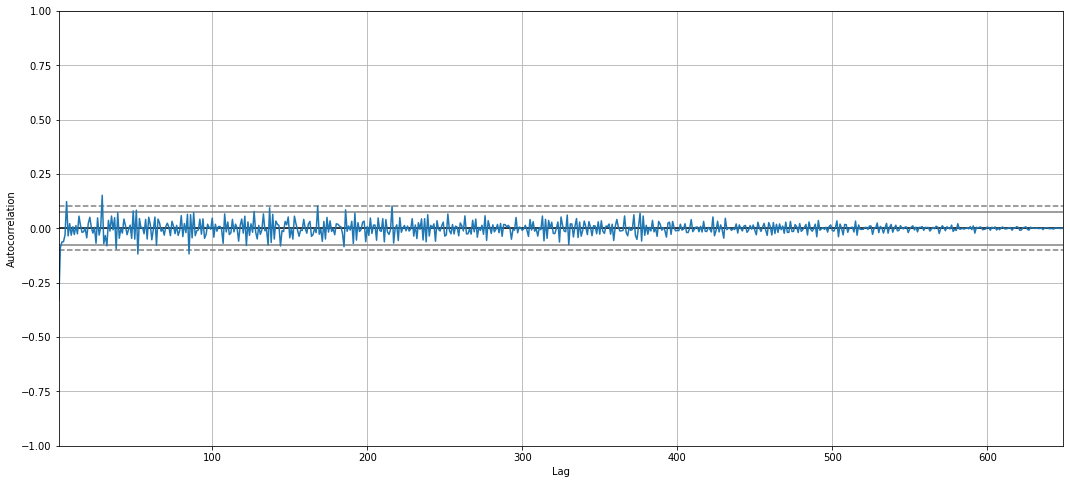

In [38]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(train.diff(periods=1).dropna())
plt.show()

### Observations: For difference periods=1
- ADF statistic value of ~ -11.62. The more negative this statistic, the more likely we are to reject the null hypothesis (we have a stationary dataset).
- p value is 2.3e-21 < 0.5 hence rejecting null hypothesis. Indicating data is stationary.
- Hence for difference 1 strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary

<a id='Section4'></a>
#  5. Time Series Forecasting analysis with ARIMA

- We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.
- ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data:

In [39]:
import itertools

p = d = q = range(0, 10)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))
#so s=12

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 0, 3, 12)
SARIMAX: (0, 0, 2) x (0, 0, 4, 12)


In [40]:

for param in pdq:
    print(param)

(0, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 0, 3)
(0, 0, 4)
(0, 0, 5)
(0, 0, 6)
(0, 0, 7)
(0, 0, 8)
(0, 0, 9)
(0, 1, 0)
(0, 1, 1)
(0, 1, 2)
(0, 1, 3)
(0, 1, 4)
(0, 1, 5)
(0, 1, 6)
(0, 1, 7)
(0, 1, 8)
(0, 1, 9)
(0, 2, 0)
(0, 2, 1)
(0, 2, 2)
(0, 2, 3)
(0, 2, 4)
(0, 2, 5)
(0, 2, 6)
(0, 2, 7)
(0, 2, 8)
(0, 2, 9)
(0, 3, 0)
(0, 3, 1)
(0, 3, 2)
(0, 3, 3)
(0, 3, 4)
(0, 3, 5)
(0, 3, 6)
(0, 3, 7)
(0, 3, 8)
(0, 3, 9)
(0, 4, 0)
(0, 4, 1)
(0, 4, 2)
(0, 4, 3)
(0, 4, 4)
(0, 4, 5)
(0, 4, 6)
(0, 4, 7)
(0, 4, 8)
(0, 4, 9)
(0, 5, 0)
(0, 5, 1)
(0, 5, 2)
(0, 5, 3)
(0, 5, 4)
(0, 5, 5)
(0, 5, 6)
(0, 5, 7)
(0, 5, 8)
(0, 5, 9)
(0, 6, 0)
(0, 6, 1)
(0, 6, 2)
(0, 6, 3)
(0, 6, 4)
(0, 6, 5)
(0, 6, 6)
(0, 6, 7)
(0, 6, 8)
(0, 6, 9)
(0, 7, 0)
(0, 7, 1)
(0, 7, 2)
(0, 7, 3)
(0, 7, 4)
(0, 7, 5)
(0, 7, 6)
(0, 7, 7)
(0, 7, 8)
(0, 7, 9)
(0, 8, 0)
(0, 8, 1)
(0, 8, 2)
(0, 8, 3)
(0, 8, 4)
(0, 8, 5)
(0, 8, 6)
(0, 8, 7)
(0, 8, 8)
(0, 8, 9)
(0, 9, 0)
(0, 9, 1)
(0, 9, 2)
(0, 9, 3)
(0, 9, 4)
(0, 9, 5)
(0, 9, 6)
(0, 9, 7)
(0, 9, 8)
(0, 9, 9)


In [41]:
mod = sm.tsa.statespace.SARIMAX(y.diff(periods=5).dropna(),
                                            order=(0, 0, 0),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False,
                                            mle_regression = False)
results = mod.fit()
print('ARIMA{} - AIC:{}'.format(param, results.aic))

ARIMA(9, 9, 9) - AIC:12516.667273258587


C:\Users\yoges\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\yoges\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [1]:
a=[]
a.append((1, 2))
a.append((1, 3))
a

[(1, 2), (1, 3)]

In [44]:
b = [23, 44, 54, 21]
b.index(min(b))

3

In [45]:
import warnings
warnings.filterwarnings("ignore")

# Transformed data ( Stationary data lag 5 )
lstAIC = []
lstParam = []
for param in pdq:
    try:
        mod = sm.tsa.statespace.SARIMAX(y.diff(periods=5).dropna(),
                                            order=param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False,
                                            mle_regression = False)
        results = mod.fit()
        print('ARIMA{} - AIC:{}'.format(param, results.aic))
        lstAIC.append(results.aic)
        lstParam.append(param)
    except:
        print("Error")
        continue

ARIMA(0, 0, 0) - AIC:12516.667273258587
ARIMA(0, 0, 1) - AIC:12412.843279793338
ARIMA(0, 0, 2) - AIC:12384.892964394701
ARIMA(0, 0, 3) - AIC:12369.31471543586
ARIMA(0, 0, 4) - AIC:12167.9911796965
ARIMA(0, 0, 5) - AIC:11976.925706445203
ARIMA(0, 0, 6) - AIC:11917.415099016423
ARIMA(0, 0, 7) - AIC:11898.657369895502
ARIMA(0, 0, 8) - AIC:11885.772661866673
ARIMA(0, 0, 9) - AIC:11871.486817002964
ARIMA(0, 1, 0) - AIC:12673.268561072264
ARIMA(0, 1, 1) - AIC:12495.172697867434
ARIMA(0, 1, 2) - AIC:12387.358554204171
ARIMA(0, 1, 3) - AIC:12358.382230853906
ARIMA(0, 1, 4) - AIC:12339.569868874918
ARIMA(0, 1, 5) - AIC:12114.85003301426
ARIMA(0, 1, 6) - AIC:11964.291099673344
ARIMA(0, 1, 7) - AIC:11908.859950906342
ARIMA(0, 1, 8) - AIC:11882.329762031171
ARIMA(0, 1, 9) - AIC:11868.518372319995
ARIMA(0, 2, 0) - AIC:13349.239061206821
ARIMA(0, 2, 1) - AIC:12655.903196645853
ARIMA(0, 2, 2) - AIC:12662.78362441831
ARIMA(0, 2, 3) - AIC:12545.610351153535
ARIMA(0, 2, 4) - AIC:12541.160946422984
ARIMA

ARIMA(2, 0, 6) - AIC:11913.710786492022
ARIMA(2, 0, 7) - AIC:11899.086151317555
ARIMA(2, 0, 8) - AIC:11884.789782407928
ARIMA(2, 0, 9) - AIC:11870.928638488014
ARIMA(2, 1, 0) - AIC:12569.047684943189
ARIMA(2, 1, 1) - AIC:12411.660483750136
ARIMA(2, 1, 2) - AIC:12359.018833949598
ARIMA(2, 1, 3) - AIC:12258.011778441414
ARIMA(2, 1, 4) - AIC:12267.799582228781
ARIMA(2, 1, 5) - AIC:12022.625277163228
ARIMA(2, 1, 6) - AIC:11920.530450930843
ARIMA(2, 1, 7) - AIC:11905.862368757678
ARIMA(2, 1, 8) - AIC:11884.917459172324
ARIMA(2, 1, 9) - AIC:11869.905952261797
ARIMA(2, 2, 0) - AIC:12884.46681186138
ARIMA(2, 2, 1) - AIC:12584.605561961116
ARIMA(2, 2, 2) - AIC:12590.25375667974
ARIMA(2, 2, 3) - AIC:12416.822898268052
ARIMA(2, 2, 4) - AIC:12360.935808407368
ARIMA(2, 2, 5) - AIC:12359.089509689155
ARIMA(2, 2, 6) - AIC:12053.240125351409
ARIMA(2, 2, 7) - AIC:11977.636976482963
ARIMA(2, 2, 8) - AIC:11976.46919978528
ARIMA(2, 2, 9) - AIC:11907.472438872821
ARIMA(2, 3, 0) - AIC:13417.858537591137
ARI

ARIMA(4, 1, 2) - AIC:12332.460285126977
ARIMA(4, 1, 3) - AIC:12243.740289689875
ARIMA(4, 1, 4) - AIC:12304.538870385251
ARIMA(4, 1, 5) - AIC:11975.480029170943
ARIMA(4, 1, 6) - AIC:11917.1023661918
ARIMA(4, 1, 7) - AIC:11903.975036017415
ARIMA(4, 1, 8) - AIC:11884.883870025678
ARIMA(4, 1, 9) - AIC:11872.130513378313
ARIMA(4, 2, 0) - AIC:12700.76506805349
ARIMA(4, 2, 1) - AIC:12541.480572866838
ARIMA(4, 2, 2) - AIC:12776.986599960339
ARIMA(4, 2, 3) - AIC:12332.402670978967
ARIMA(4, 2, 4) - AIC:12240.240065637548
ARIMA(4, 2, 5) - AIC:12256.856773496658
ARIMA(4, 2, 6) - AIC:12012.616679079763
ARIMA(4, 2, 7) - AIC:11984.044157320197
ARIMA(4, 2, 8) - AIC:11978.891113061494
ARIMA(4, 2, 9) - AIC:11906.551725242778
ARIMA(4, 3, 0) - AIC:12946.920575770924
ARIMA(4, 3, 1) - AIC:12733.901458020378
ARIMA(4, 3, 2) - AIC:12697.630108168683
ARIMA(4, 3, 3) - AIC:12493.617550939045
ARIMA(4, 3, 4) - AIC:12407.566200918165
ARIMA(4, 3, 5) - AIC:12360.480714689547
ARIMA(4, 3, 6) - AIC:12293.343418177314
ARI

ARIMA(6, 1, 8) - AIC:11881.221488054387
ARIMA(6, 1, 9) - AIC:11864.357927255682
ARIMA(6, 2, 0) - AIC:12470.457153595897
ARIMA(6, 2, 1) - AIC:12211.69129076337
ARIMA(6, 2, 2) - AIC:12197.576227432293
ARIMA(6, 2, 3) - AIC:12217.8105985722
ARIMA(6, 2, 4) - AIC:12235.607989277125
ARIMA(6, 2, 5) - AIC:12134.292507324057
ARIMA(6, 2, 6) - AIC:11969.123739148821
ARIMA(6, 2, 7) - AIC:11946.451871324336
ARIMA(6, 2, 8) - AIC:11932.78590576264
ARIMA(6, 2, 9) - AIC:11897.659285163947
ARIMA(6, 3, 0) - AIC:12828.689070097658
ARIMA(6, 3, 1) - AIC:12544.13302028157
ARIMA(6, 3, 2) - AIC:12424.636720326482
ARIMA(6, 3, 3) - AIC:12554.30962205688
ARIMA(6, 3, 4) - AIC:12357.2091929497
ARIMA(6, 3, 5) - AIC:12289.971752627016
ARIMA(6, 3, 6) - AIC:12189.326528079833
ARIMA(6, 3, 7) - AIC:12135.247142474713
ARIMA(6, 3, 8) - AIC:12055.19798894394
ARIMA(6, 3, 9) - AIC:12014.605101958881
ARIMA(6, 4, 0) - AIC:13162.960086136483
ARIMA(6, 4, 1) - AIC:12892.320055713753
ARIMA(6, 4, 2) - AIC:12725.121491141537
ARIMA(6, 

ARIMA(8, 2, 5) - AIC:12052.523329568263
ARIMA(8, 2, 6) - AIC:12011.558609305112
ARIMA(8, 2, 7) - AIC:11942.88134693092
ARIMA(8, 2, 8) - AIC:11916.202485436985
ARIMA(8, 2, 9) - AIC:11895.069174960163
ARIMA(8, 3, 0) - AIC:12484.829530099001
ARIMA(8, 3, 1) - AIC:12322.559483886536
ARIMA(8, 3, 2) - AIC:12308.275042209085
ARIMA(8, 3, 3) - AIC:12233.146325864502
ARIMA(8, 3, 4) - AIC:12183.861126751559
ARIMA(8, 3, 5) - AIC:12145.757746368014
ARIMA(8, 3, 6) - AIC:12142.50354236683
ARIMA(8, 3, 7) - AIC:12088.055373357018
ARIMA(8, 3, 8) - AIC:12076.919695033568
ARIMA(8, 3, 9) - AIC:12031.167437930388
ARIMA(8, 4, 0) - AIC:12847.926299802677
ARIMA(8, 4, 1) - AIC:12560.814167519464
ARIMA(8, 4, 2) - AIC:12503.45773870172
ARIMA(8, 4, 3) - AIC:12443.423902890752
ARIMA(8, 4, 4) - AIC:12376.321523600098
ARIMA(8, 4, 5) - AIC:12337.646940587976
ARIMA(8, 4, 6) - AIC:12338.327941435691
ARIMA(8, 4, 7) - AIC:12247.338769979855
ARIMA(8, 4, 8) - AIC:12181.932967866042
ARIMA(8, 4, 9) - AIC:12186.937906048288
ARI

In [49]:
lstParam[lstAIC.index(min(lstAIC))], min(lstAIC)

((5, 1, 9), 11861.636291048464)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Transformed data ( Stationary data lag 5 )

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y.diff(periods=5).dropna(),
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False,
                                            mle_regression = False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:12516.667273258587
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:12320.789562727265
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:12125.073499841548
ARIMA(0, 0, 0)x(0, 0, 3, 12)12 - AIC:11929.87249147706
ARIMA(0, 0, 0)x(0, 0, 4, 12)12 - AIC:11733.894760275136
ARIMA(0, 0, 0)x(0, 0, 5, 12)12 - AIC:11538.548696913636
ARIMA(0, 0, 0)x(0, 0, 6, 12)12 - AIC:11342.982634211221
ARIMA(0, 0, 0)x(0, 0, 7, 12)12 - AIC:11142.70201996067
ARIMA(0, 0, 0)x(0, 0, 8, 12)12 - AIC:10934.772781276866
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:12827.13416900708
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:12231.68255843181
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:12040.355091013804


### Parameter Selection: 
- This step is parameter Selection for our Employed people ARIMA Time Series Model. 
- Our goal here is to use a “grid search” to find the optimal set of parameters that yields the best performance for our model.

In [ ]:

warnings.filterwarnings("ignore")

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.80)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
   # print("Evaluating ARIMA model - Make prediction")
    for t in range(len(test)):
      #  print("for test t:", t)
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
       # print('p:', p)
        for d in d_values:
           # print('d:', d)
            for q in q_values:
                order = (p,d,q)
               # print("Order:", order)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                   # print("RMSE: ", rmse)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    print("Error")
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
%time evaluate_models(y['RentalBikes'], p_values, d_values, q_values)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.80)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
   # print("Evaluating ARIMA model - Make prediction")

    for t in range(len(test)):
      #  print("for test t:", t)
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse, model_fit.aic

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
       # print('p:', p)
        for d in d_values:
           # print('d:', d)
            for q in q_values:
                order = (p,d,q)
               # print("Order:", order)
                try:
                    rmse, aic = evaluate_arima_model(dataset, order)
                   # print("RMSE: ", rmse)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f, aci=%.3f' % (order,rmse, aic))
                except:
                    print("Error")
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    
# evaluate parameters
p_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
d_values = range(0, 10)
q_values = range(0, 10)
warnings.filterwarnings("ignore")
%time evaluate_models(y['RentalBikes'], p_values, d_values, q_values)

evaluate_arima_model(y['RentalBikes'], (0,0, 0))

warnings.filterwarnings("ignore")

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.ARIMA(train.diff(periods=1).dropna(),
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

import pmdarima as pm
import numpy as np


#Fit a simple auto_arima model
arima = pm.auto_arima(train.diff(periods=1).dropna(), error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=True, m=12)

#Plot actual test vs. forecasts:
x = np.arange(test.shape[0])
plt.scatter(x, test, marker='x')
plt.plot(x, arima.predict(n_periods=test.shape[0]))
plt.title('Actual test samples vs. forecasts')
plt.show()

In [ ]:
# ARIMA(5,0,3)(0,0,0)[12]             : AIC=10628.210

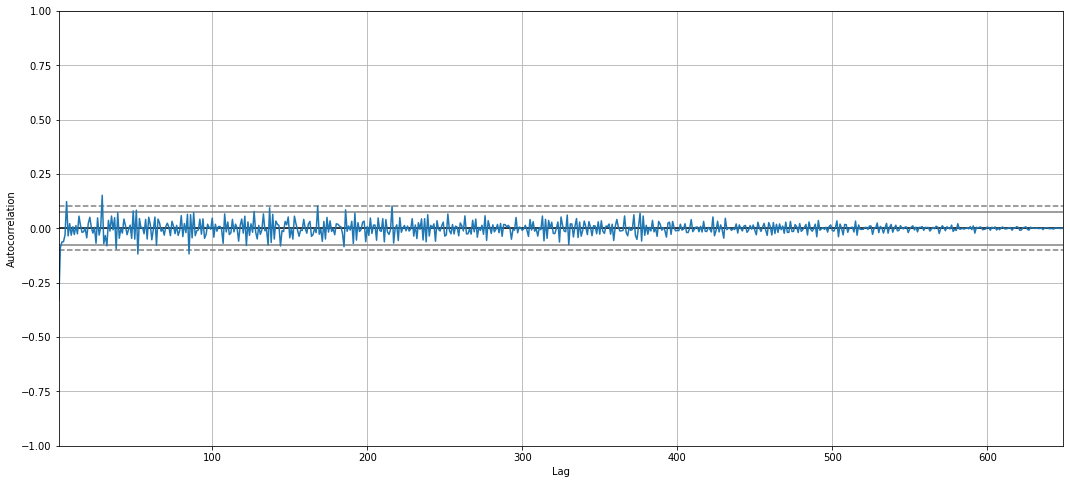

In [59]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(train.diff(periods=1).dropna())
plt.show()
# Observation: Since graph is tending to 0 hence its stationary

<a id='Section4'></a>
 # 5. Time Series Forecasting analysis with ARIMA - Fitting, Validating

In [73]:
len(y)

731

In [195]:
#pd.to_datetime(y.reset_index()['dteday'].apply(lambda x: str(x.year) + '-' + str(x.month)+ "-01"), format='%Y/%m/%d')

0     2011-01-01
1     2011-01-01
2     2011-01-01
3     2011-01-01
4     2011-01-01
         ...    
726   2012-12-01
727   2012-12-01
728   2012-12-01
729   2012-12-01
730   2012-12-01
Name: dteday, Length: 731, dtype: datetime64[ns]

In [200]:
#pdMonthly = y.reset_index()[['dteday','RentalBikes']]

In [201]:
#pdMonthly["dteday"]=pd.to_datetime(y.reset_index()['dteday'].apply(lambda x: str(x.year) + '-' + str(x.month)+ "-01"), format='%Y/%m/%d')
#y["Monthly"]=pd.to_datetime(y['Monthly'], format='%Y/%m/%d')

#pdMonthly.head()

,dteday,RentalBikes
0,2011-01-01,985
1,2011-01-01,801
2,2011-01-01,1349
3,2011-01-01,1562
4,2011-01-01,1600


In [205]:
#y = pdMonthly.groupby('dteday').sum()

In [207]:
len(y)

24

In [208]:
train, test = model_selection.train_test_split(y, train_size=650)

In [52]:
# Fitting ARIMA
# For non-seasonal data
# p=1, d=1,q= 0 or 1
# Arima works well when data is non-seasonal

#Best ARIMA(1, 1, 2) RMSE=1189.422

import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima.model import ARIMA

y=y[["RentalBikes"]]
model = ARIMA(train, order = (5, 1, 9))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            RentalBikes   No. Observations:                  650
Model:                 ARIMA(5, 1, 9)   Log Likelihood               -5299.035
Date:                Mon, 16 May 2022   AIC                          10628.069
Time:                        20:37:06   BIC                          10695.201
Sample:                    01-01-2011   HQIC                         10654.110
                         - 10-11-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0608      1.670      0.036      0.971      -3.213       3.334
ar.L2          0.0982      1.427      0.069      0.945      -2.699       2.895
ar.L3         -0.6230      0.669     -0.931      0.352      -1.935       0.689
ar.L4         -0.3276      0.716     -0.458      0.647      -1.730       1.075
ar.L5         -0.1718      0.351     -0.489      0.625      -0.861       0.517
ma.L1         -0.6876      1.671     -0.412      0.681      -3.963       2.587
ma.L2         -0.2432      2.448     -0.099      0.921      -5.042       4.555
ma.L3          0.6251      1.267      0.493      0.622      -1.859       3.109
ma.L4         -0.0750      0.538     -0.139      0.889      -1.130       0.980
ma.L5         -0.0954      0.569     -0.168      0.867      -1.210       1.019
ma.L6         -0.0792      0.232     -0.342      0.733      -0.533       0.375
ma.L7         -0.1919      0.097     -1.981      0.048      -0.382      -0.002
ma.L8         -0.0224      0.348     -0.064      0.949      -0.705       0.661
ma.L9          0.0797      0.228      0.350      0.726      -0.366       0.526
sigma2      7.657e+05   2.84e+04     26.959      0.000     7.1e+05    8.21e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               759.02
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               3.09   Skew:                            -1.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#y['forecast']=result.predict(start=600,end=800,dynamic=True)
#y[['RentalBikes','forecast']].plot()

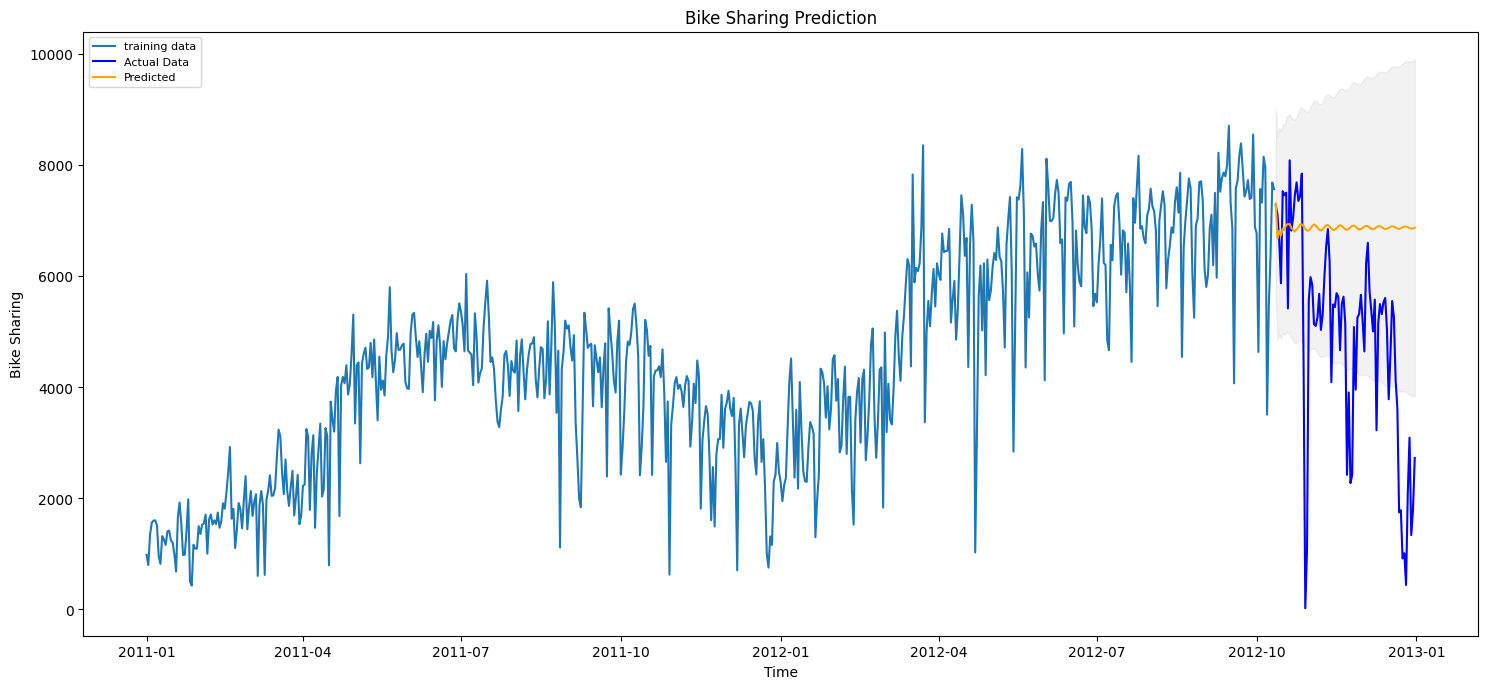

In [51]:
fc=result.get_forecast(len(test), alpha=0.05).summary_frame()
fc_series = pd.Series(fc['mean'], index=test.index)
lower_series = pd.Series(fc['mean_ci_lower'], index=test.index)
upper_series = pd.Series(fc['mean_ci_upper'], index=test.index)

plt.figure(dpi=100)
plt.plot(train, label='training data')
plt.plot(test, color = 'blue', label='Actual Data')
plt.plot(fc_series, color='orange', label='Predicted')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=0.05)
plt.title("Bike Sharing Prediction")
plt.xlabel("Time")
plt.ylabel("Bike Sharing")
plt.legend(loc="upper left", fontsize=8)
plt.show()

In [53]:
def calculate_accuracy(final_df):
    from sklearn.metrics import mean_absolute_error
    #final_df = results.set_index('ds')

    pdTemp=final_df[['y', 'yhat']]
    
    # calculate Mean Absolute Error (MAE) between expected and predicted values for december
    y_true = pdTemp.dropna()['y'].values
    y_pred = pdTemp.dropna()['yhat'].values

    mae = mean_absolute_error(y_true, y_pred)
    print(': MAE: %.3f' % mae)

    eval_df = pdTemp.dropna()[['y', 'yhat']]
    eval_df['abs_error'] = abs(eval_df['y'] - eval_df['yhat'])
    total_y = sum(eval_df['y'])
    total_error=sum(eval_df['abs_error'])
    forecast_acc=1-(total_error/total_y)
    print("Forecating Accuracy (RMSE): ", forecast_acc)

    eval_df['abs_error'].plot(title='Absolute Error plot')
    plt.plot()

    return

: MAE: 2089.081
Forecating Accuracy (RMSE):  0.5792112145212313


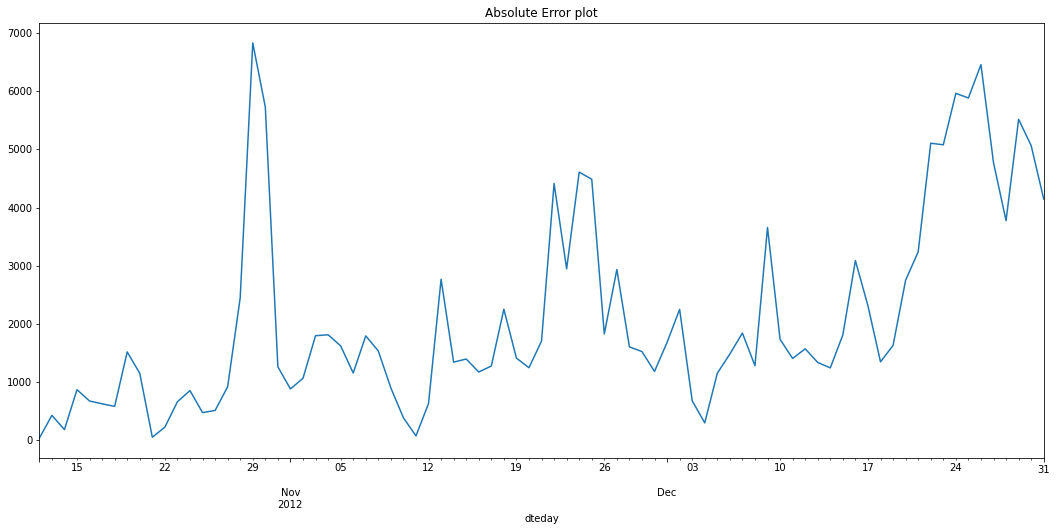

In [56]:
# Calculating the Final Result
final = test[['RentalBikes']].rename(columns={"RentalBikes": "y"})
final['yhat'] = fc['mean']
calculate_accuracy(final)

In [57]:
# Fitting ARIMA
# For non-seasonal data
# p=1, d=1,q= 0 or 1
# Arima works well when data is non-seasonal

#Best ARIMA(1, 1, 2) RMSE=1189.422

import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima.model import ARIMA

y=y[["RentalBikes"]]
model = ARIMA(train, order = (5, 3, 4))
result = model.fit()
result.summary()
#y['forecast']=result.predict(start=600,end=800,dynamic=True)
#y[['RentalBikes','forecast']].plot()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            RentalBikes   No. Observations:                  650
Model:                 ARIMA(5, 3, 4)   Log Likelihood               -5363.195
Date:                Mon, 16 May 2022   AIC                          10746.391
Time:                        20:38:56   BIC                          10791.114
Sample:                    01-01-2011   HQIC                         10763.741
                         - 10-11-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1449      0.057     20.209      0.000       1.034       1.256
ar.L2         -0.5461      0.084     -6.471      0.000      -0.712      -0.381
ar.L3         -0.1597      0.101     -1.575      0.115      -0.359       0.039
ar.L4          0.0023      0.091      0.025      0.980      -0.177       0.181
ar.L5         -0.1653      0.057     -2.918      0.004      -0.276      -0.054
ma.L1         -3.6158      0.031   -117.393      0.000      -3.676      -3.555
ma.L2          5.2135      0.082     63.432      0.000       5.052       5.375
ma.L3         -3.5755      0.081    -43.905      0.000      -3.735      -3.416
ma.L4          0.9788      0.030     32.576      0.000       0.920       1.038
sigma2      1.244e+06   6.59e-08   1.89e+13      0.000    1.24e+06    1.24e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.76   Jarque-Bera (JB):               597.40
Prob(Q):                              0.38   Prob(JB):                         0.00
Heteroskedasticity (H):               3.48   Skew:                            -1.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.76e+28. Standard errors may be unstable.
"""

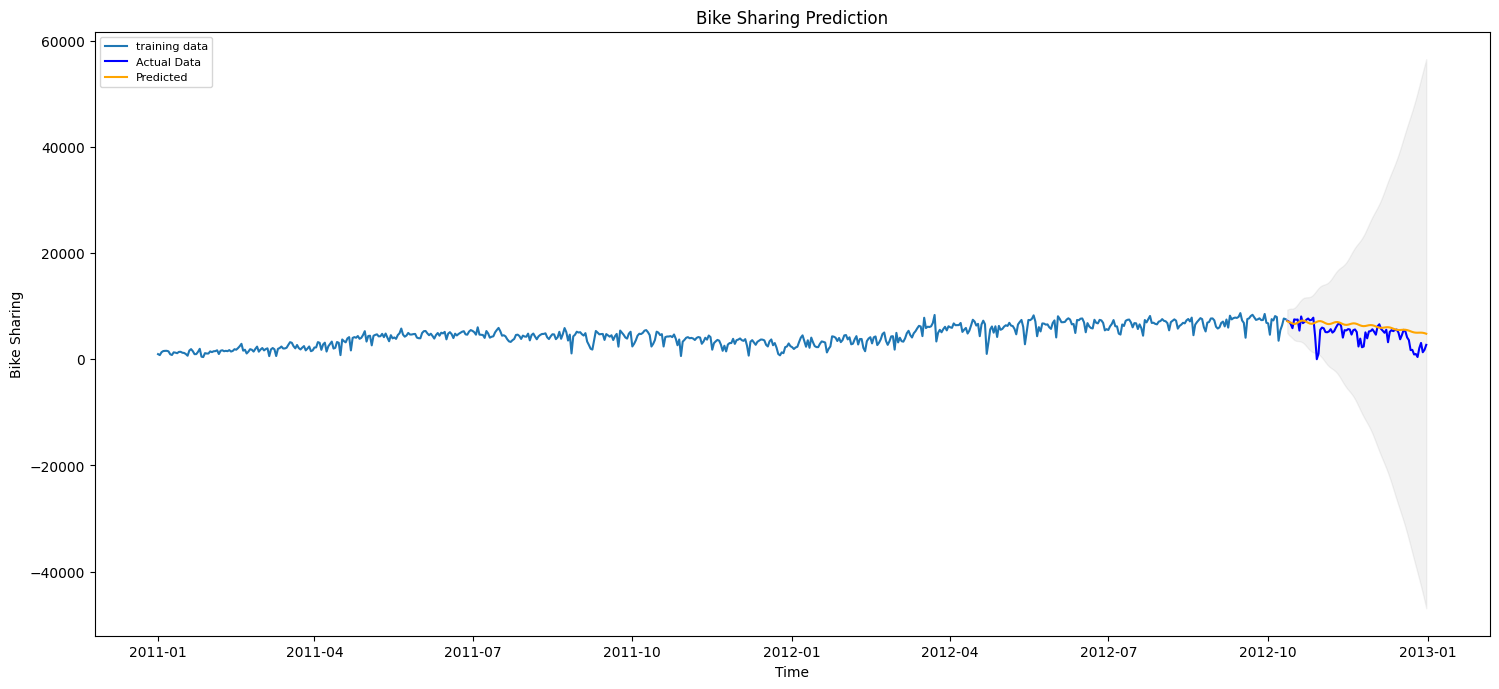

In [58]:
fc=result.get_forecast(len(test), alpha=0.05).summary_frame()
fc_series = pd.Series(fc['mean'], index=test.index)
lower_series = pd.Series(fc['mean_ci_lower'], index=test.index)
upper_series = pd.Series(fc['mean_ci_upper'], index=test.index)

plt.figure(dpi=100)
plt.plot(train, label='training data')
plt.plot(test, color = 'blue', label='Actual Data')
plt.plot(fc_series, color='orange', label='Predicted')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=0.05)
plt.title("Bike Sharing Prediction")
plt.xlabel("Time")
plt.ylabel("Bike Sharing")
plt.legend(loc="upper left", fontsize=8)
plt.show()

: MAE: 1545.976
Forecating Accuracy (RMSE):  0.6886051323459581


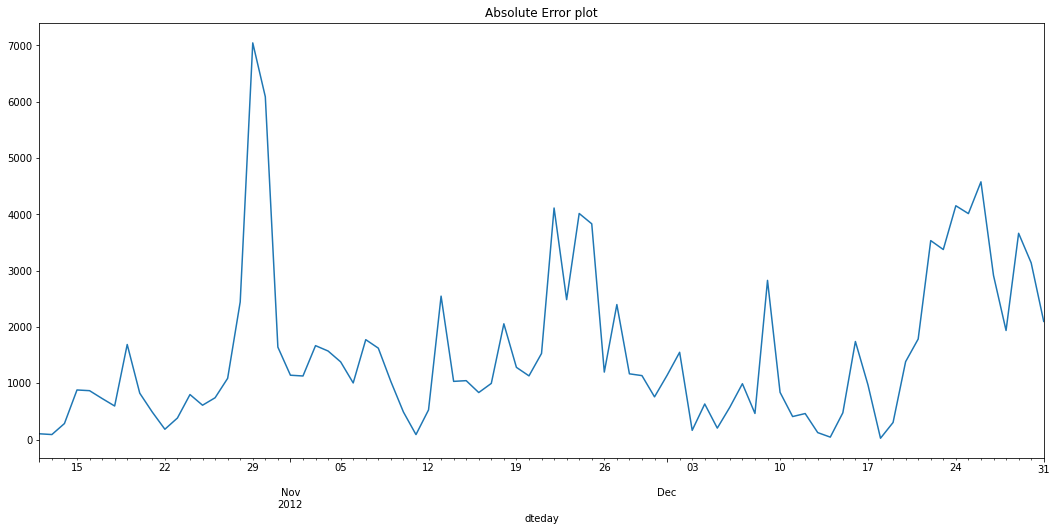

In [59]:
# Calculating the Final Result
final = test[['RentalBikes']].rename(columns={"RentalBikes": "y"})
final['yhat'] = fc['mean']
calculate_accuracy(final)

<AxesSubplot:xlabel='dteday'>

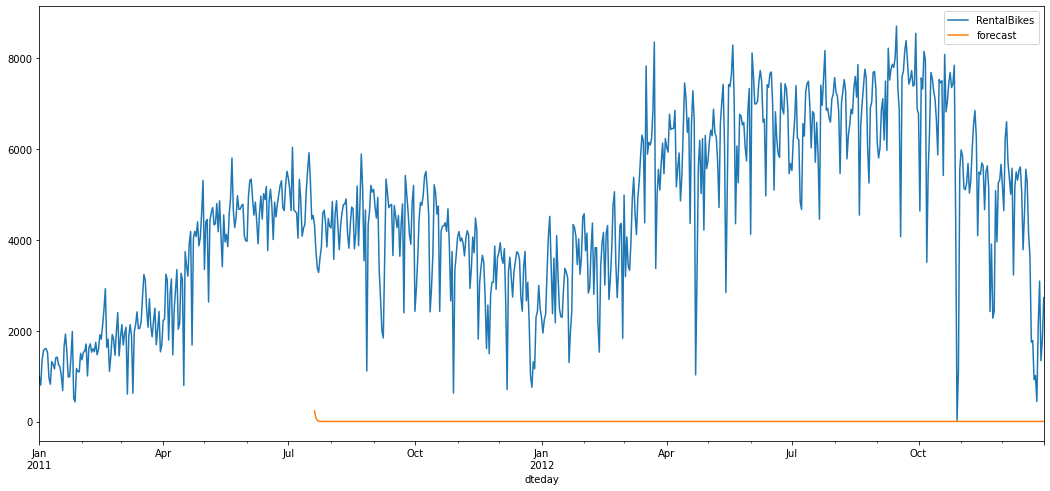

In [105]:
# Fitting ARIMA
# For non-seasonal data
# p=1, d=1,q= 0 or 1
# Arima works well when data is non-seasonal

#Best ARIMA(1, 1, 2) RMSE=1189.422

import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima_model import ARIMA

y=y[["RentalBikes"]]
model = ARIMA(y, order = (1, 1, 2))
result = model.fit()
result.summary()
y['forecast']=result.predict(start=200,end=800,dynamic=True)
y[['RentalBikes','forecast']].plot()

<AxesSubplot:xlabel='dteday'>

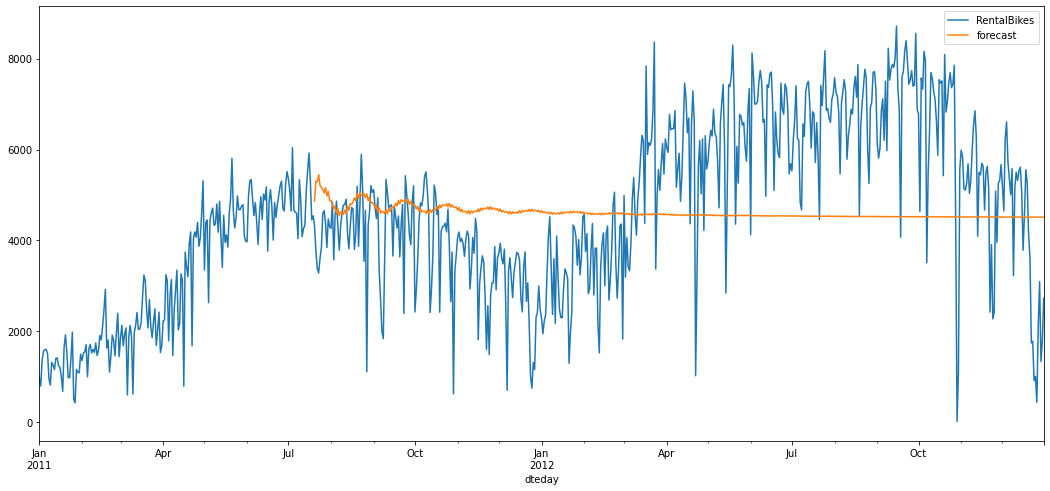

In [97]:
# Fitting ARIMA
# For non-seasonal data
# p=1, d=1,q= 0 or 1
# Arima works well when data is non-seasonal

#Best ARIMA(1, 1, 2) RMSE=1189.422

import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima_model import ARIMA

y=y[["RentalBikes"]]
model = ARIMA(y, order = (10, 0, 5))
result = model.fit()
result.summary()
y['forecast']=result.predict(start=200,end=800,dynamic=True)
y[['RentalBikes','forecast']].plot()

In [101]:
model.transparams

False

<AxesSubplot:xlabel='dteday'>

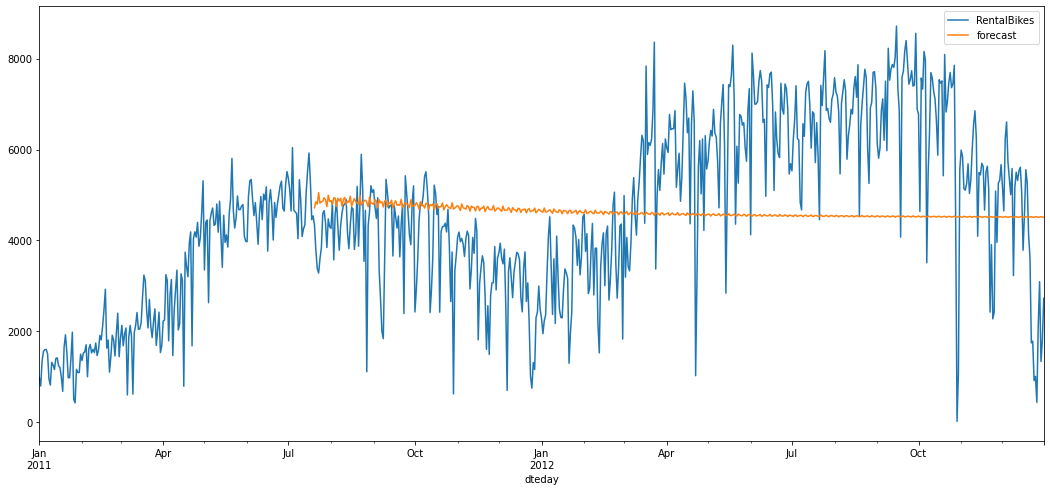

In [99]:
# Fitting ARIMA
# For non-seasonal data
# p=1, d=1,q= 0 or 1
# Arima works well when data is non-seasonal

#Best ARIMA(1, 1, 2) RMSE=1189.422

import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima_model import ARIMA

y=y[["RentalBikes"]]
model = ARIMA(y, order = (10, 0, 6))
result = model.fit()
result.summary()
y['forecast']=result.predict(start=200,end=800,dynamic=True)
y[['RentalBikes','forecast']].plot()